In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os


datasets = [ 'original','diagnostic','prognostic','cervical_cancer','mammographic','messidor']
alias_Dataset = ['WBCD Diagnostic II','WBCD Diagnostic I','WBCD Prognostic','Cervical Cancer','Mammographic Mass','Diabetic Retinopathy Debrecen']
alias_DatasetNames = ['Diagnostic_II','Diagnostic','Prognostic','cervical_cancer','mammographic','messidor']


algorithms = ['OPF', 'SMOTE','BorderlineSMOTE','ADASYN']
alias_algorithms = ['O$^2$PF', 'SMOTE','BorderlineSMOTE','ADASYN']


percentOPF = ['0.75','1.0']
percentSMOTE= ['0.75','1']
percentLabel = ['75%','100%']
percentLabelName = [ '0_75','1_00']

k_number = [5,6,7,8,9,10]
k_max = [5,10,30,50,80,100]

In [2]:
def loadOPF(ds,p,alg):
    X = []
    for i in np.arange(1,21):
        val = np.loadtxt('Results/OPF/{}/{}/{}/validation.txt'.format(datasets[ds],str(i),percentOPF[p]),delimiter=',')
        X.append(val[:,1])
    X = np.asarray(np.vstack(X))
    return X

In [3]:
def loadSMOTE(ds,p,alg):
    X = []
    for i in np.arange(1,21):
        path = 'Results/{}/{}/{}/{}/results_validation.txt'.format(algorithms[alg],datasets[ds],str(i),percentOPF[p]) 
        if not os.path.exists(path):
            path = 'Results/{}/{}/{}/{}/results_validation.txt'.format(algorithms[alg],datasets[ds],str(i),percentSMOTE[p]) 

        val = np.loadtxt(path,delimiter=' ',skiprows=1)
        X.append(val[:,1])
    X = np.asarray(np.vstack(X))
    return X

In [4]:
def calcularValores(ds):
    # # algorithms, # statistics
    mat = np.zeros((len(algorithms),len(percentLabel),len(k_number),2))

    for alg in range(len(algorithms)):
        for p in range(len(percentLabel)):  
            if algorithms[alg]=='OPF':            
                X = loadOPF(ds,p,alg)
            else:
                X = loadSMOTE(ds,p,alg)   
            for k in range(len(k_number)):
                mat[alg,p,k,0] = np.average(X[k])
                mat[alg,p,k,1] = np.std(X[k])

    return mat

In [10]:
def plotLine(alg,ax, color,matrix, X):
    y = matrix[alg,:,0]
    y1 = y+ matrix[alg,:,1]  


    y2 = y-matrix[alg,:,1]
    ax.fill_between(X, y, y1, where=y1 > y, facecolor=color,alpha=0.5, interpolate=True)
    ax.fill_between(X, y, y2, where=y2 < y, facecolor=color,alpha=0.5, interpolate=True)    
    return ax.plot(X, y, color=color, label=alias_algorithms[alg])

def plot(dt,p,matrix):
    fig, ax = plt.subplots()

    
    ax.set_ylabel('Accuracy',fontsize=14)
    ax.set_xlabel('$k_{\max}$',fontsize=14)
    
    lns = plotLine(0,ax,'blue',matrix,k_max)
        
    ax2 = ax.twiny()
        
    lns = lns + plotLine(1,ax2,'red',matrix,k_number) 
    lns = lns + plotLine(2,ax2,'yellow',matrix,k_number) 
    lns = lns + plotLine(3,ax2,'green',matrix,k_number) 
    
    
    ax2.set_xlabel('$\kappa$',fontsize=14)   

    labs = [l.get_label() for l in lns]
    legenda =ax.legend(lns, labs, loc=1)
    legenda =ax.legend(lns, labs, loc='lower right')
  
    
    legenda = ax2.legend(shadow= True)

    frame = legenda.get_frame()
    frame.set_facecolor('0.90')

    for label in legenda.get_texts():
        label.set_fontsize('large')

    for label in legenda.get_lines():
        label.set_linewidth(1.5)  # the legend line width

    plt.tight_layout()
    plt.savefig('plots/{}_{}.pdf'.format(alias_DatasetNames[dt],percentLabelName[p] ), format='pdf',bbox_inches='tight')
    

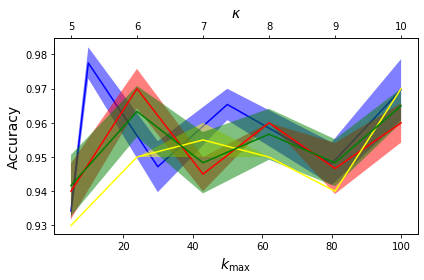

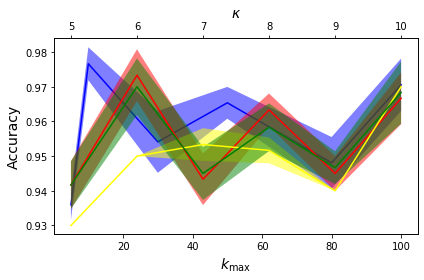

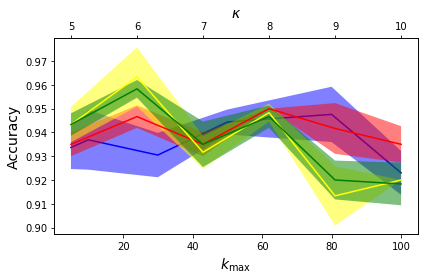

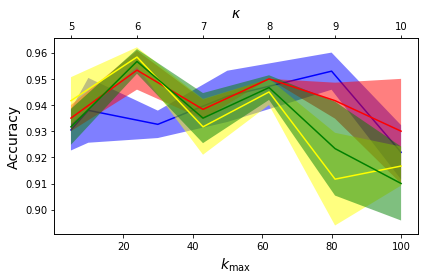

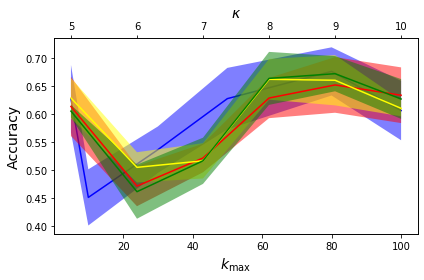

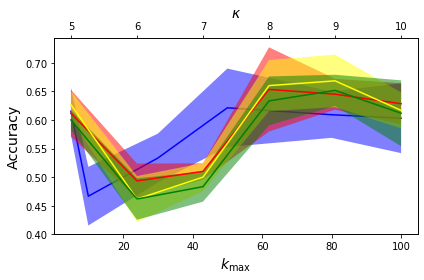

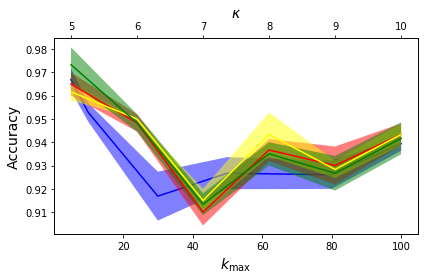

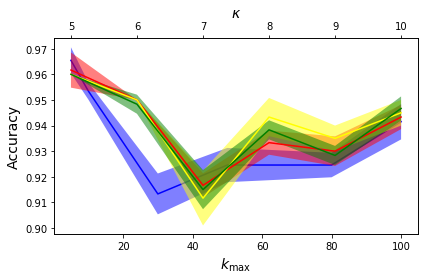

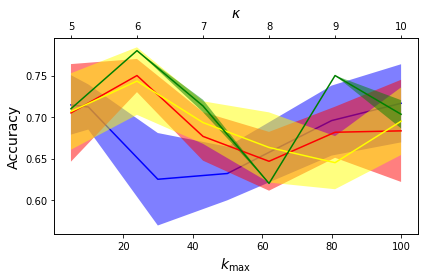

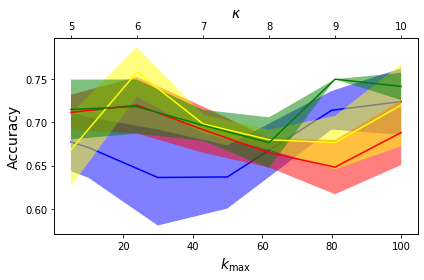

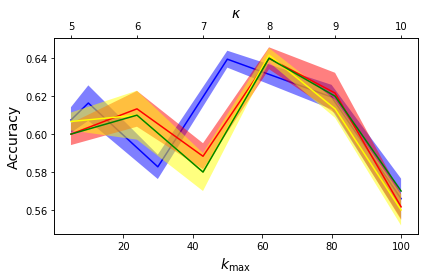

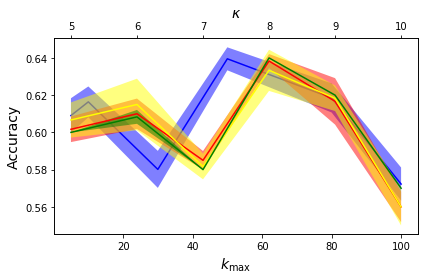

In [11]:

matrizValores= np.zeros((len(datasets),len(algorithms),len(percentLabel),len(k_number),2))


for dt in range(len(datasets)):
    matrizValores[dt,:,:,:] = calcularValores(dt)
    for p in range(len(percentLabel)):
        plot(dt,p, matrizValores[dt,:,p,...])